In [9]:
pip install pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
df = pd.read_csv("Spam.csv", encoding="latin-1")
df = df.iloc[:, [0, 1]]
df.columns = ['label', 'message']

In [12]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [13]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 label      0
message    0
dtype: int64


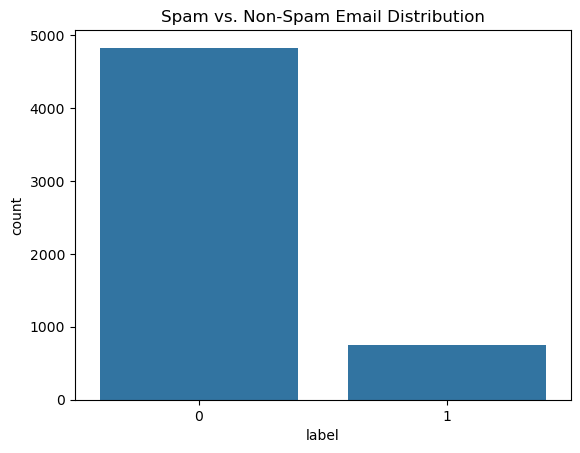

In [14]:
sns.countplot(x=df['label'])
plt.title("Spam vs. Non-Spam Email Distribution")
plt.show()

In [15]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

df['cleaned_message'] = df['message'].apply(clean_text)

In [16]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df['cleaned_message'])
y = df['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [19]:
y_pred = model.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.97


In [21]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



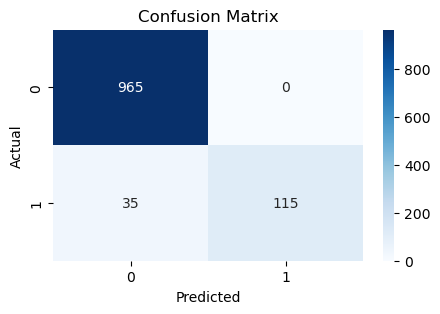

In [22]:
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [25]:
def predict_spam(text):
    cleaned_text = clean_text(text)
    vectorized_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vectorized_text)
    return "Spam" if prediction[0] == 1 else "Not Spam"
test_email_1 = "Congratulations! You won a free iPhone. Click here to claim now!"
test_email_2 = "Hi John, can we schedule a meeting for tomorrow?"
print(f"Test Email 1: {predict_spam(test_email_1)}")
print(f"Test Email 2: {predict_spam(test_email_2)}")

Test Email 1: Spam
Test Email 2: Not Spam
